Missing values per column:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  
(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 col

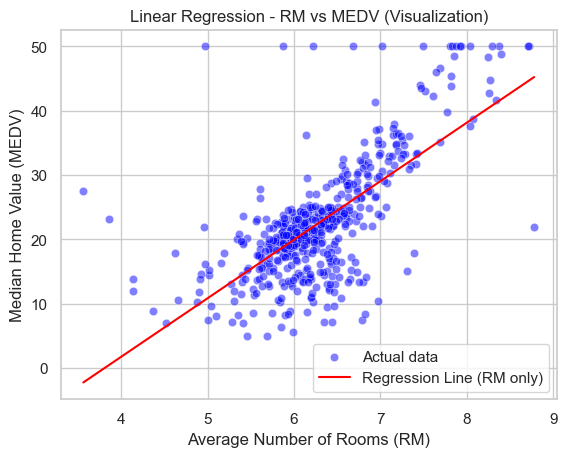

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("C:/Users/ASUS/Downloads/Boston housing dataset - Boston housing dataset.csv")
print("Missing values per column:\n", data.isnull().sum())
data.fillna(data.mean(numeric_only=True), inplace=True)
print(data.head())
print(data.shape)
print(data.info())
X = data.drop('MEDV', axis=1) 
y = data['MEDV'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)
rm_model = LinearRegression()
rm_model.fit(data[['RM']], data['MEDV'])
data['Predicted'] = rm_model.predict(data[['RM']])
sns.set(style='whitegrid')
sns.scatterplot(x='RM', y='MEDV', data=data, label='Actual data', color='blue', alpha=0.5)
sns.lineplot(x='RM', y='Predicted', data=data, label='Regression Line (RM only)', color='red')
plt.title("Linear Regression - RM vs MEDV (Visualization)")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Home Value (MEDV)")
plt.legend()
plt.show()